# QBio202: Deterministic Processes in Biology
# SS 2023
# Exercises 06 (due to 2023-05-24)

***
Ingo Giebel

Student number: 3050992
***

## Package imports

In [1]:
from sympy import Matrix, plot, solve, solveset, Symbol, Trace

## Task 1.

### Substitutions for nondimensionalization

According to (Fairén, 1979), "all quantities can be rendered dimensionless by convenient change of scales". To this end, in this paper the following substitutions (5a) - (5f) are given:
$$
\begin{align*}
    \tau &= k_2t\\
    x &= \frac{k_2}{k_3}X\\
    y &= \frac{k_2}{k_3}Y\\
    a &= \frac{k_5}{k_3}A\\
    b &= \frac{k_1}{k_3}B\\
    q &= \frac{k_3^2k_4}{k_2^2}\\
\end{align*}
$$
The above substitutions are rewritten to fit for the equations (2) and (3), as (Fairén, 1979) uses different constant and variable symbols than the symbols used here: $[X]$ instead of $X$, $X$ instead of $x$, $[Y]$ instead of $Y$, $Y$ instead of $y$, $[A]$ instead of $A$, $A$ instead of $a$, $[B]$ instead of $B$, $B$ instead of $b$, $k_2$ instead of $k_1$, $k_3$ instead of $k_2$, $k_4$ instead of $k_3$, $k_5$ instead of $k_4$, $k_1$ instead of $k_5$.

Note that according to (Fairén, 1979) the constants $k_1$, $k_2$, $k_3$, $k_5$ are reaction rates, but $k_4$ is the "dimensional power of the inhibitory step" and therefore **not a reaction rate** as opposed to what is said in the exercise sheet.

### Analysis of the quantity dimensions

Given that $t$ in equation (2) has a time dimension (common unit: $\mathrm{min}$), and $X$, $Y$, $A$, $B$ are concentration variables and constants having a molarity dimension (common unit: $1 \mathrm{M} = 1 \mathrm{mol/L}$), it follows that with the substitutions given in (5):
* $k_1$, $k_2$, $k_5$ have the dimension $\mathrm{time}^{-1}$
* $k_3$ has the dimension $\mathrm{time}^{-1}\mathrm{molarity}^{-1}$
* $k_4$ has the dimension $\mathrm{molarity}^{-1}$
* $\tau = k_2t$ is dimensionless
* $x = \frac{k_2}{k_3}X$ has the dimension $\mathrm{molarity}^2$
* $y = \frac{k_2}{k_3}Y$ has the dimension $\mathrm{molarity}^2$
* $a = \frac{k_5}{k_3}A$ has the dimension $\mathrm{molarity}^2$
* $b = \frac{k_1}{k_3}B$ has the dimension $\mathrm{molarity}^2$
* $q = k_4\frac{k_3^2}{k_2^2}$ has the dimension $\mathrm{molarity}^{-3}$

According to these considerations, the derived quantities are not dimensionless (except $\tau$) as opposed to what is stated in the paper. Yet other papers make the assumption that the concentration variables and constants are given as dimensionless quantities. Under this assumption, the molarity dimension would cancel out, and all the derived variables and constants would indeed be dimensionless.

### Biological interpretation of $a$, $b$ and $q$

* $a$ is the molar increase of metabolite $A$ per time unit divided by the reaction rate constant for the metabolism of the nutrient and oxygen (reaction $X + Y \rightarrow P$)
* $b$ is the molar increase of metabolite $B$ per time unit divided by the reaction rate constant for the metabolism of the nutrient and oxygen
* $q$ is the **inhibitory effect of oxygen** multiplied with the squared quotient of the reaction rate for the metabolism of the nutrient and oxygen divided by the reverse reaction rate of oxygen to metabolite $B$

### Derivation of the nondimensionalized equations

Using the substitutions (5), the equations (2) can be rewritten as follows:
$$
\begin{align*}
    \frac{\mathrm{d}X}{\mathrm{d}t} &= k_1B - k_2X - \frac{k_3XY}{(1 + k_4X)^2}\\
    \Longrightarrow\\
    \frac{\mathrm{d}(\frac{k_3}{k_2}x)}{\mathrm{d}(\frac{\tau}{k_2})} &= k_1(\frac{k_3}{k_1}b) - k_2(\frac{k_3}{k_2}x) - \frac{k_3(\frac{k_3}{k_2}x)(\frac{k_3}{k_2}y)}{(1 + k_4(\frac{k_3}{k_2}x))^2}\\
    \Longrightarrow\\
    k_3\frac{\mathrm{d}x}{\mathrm{d}\tau} &= k_3b - k_3x - k_3\frac{(\frac{k_3}{k_2})^2xy}{(1 + k_4\frac{k_3}{k_2}x)^2}\\
    \Longrightarrow\\
    \frac{\mathrm{d}x}{\mathrm{d}\tau} &= b - x - \frac{xy}{(\frac{k_2}{k_3})^2(1 + k_4\frac{k_3}{k_2}x)^2}\\
    \Longrightarrow\\
    \frac{\mathrm{d}x}{\mathrm{d}\tau} &= b - x - \frac{xy}{(\frac{k_2}{k_3} + k_4x)^2}\\
\end{align*}
$$
The right-hand side of this equation evaluates to $-\frac{1}{4}$ when all variables and constants are set to $1$. On the other hand, the corresponding equation (2) evaluates to $-\frac{1}{2}$ when all variables and constants are $1$. Therefore, I can not transform the original equations (2) to the nondimensionalized equations (3), using the substitutions given in (Fairén, 1979).

## Task 2.

In [2]:
# Symbol definitions needed for SymPy
x = Symbol("x", real=True)
y = Symbol("y", real=True)
a = Symbol("a", real=True)
b = Symbol("b", real=True)
q = Symbol("q", real=True)
# Derivative of x with respect to tau
xdot = b - x - x * y / (1 + q * x**2)
# Derivative of y with respect to tau
ydot = a - x * y / (1 + q * x**2)

In [3]:
xdot

b - x*y/(q*x**2 + 1) - x

In [4]:
ydot

a - x*y/(q*x**2 + 1)

### Stationary states

The stationary states of the differential equation system are determined by the function values $\bar{x}$, $\bar{y}$ such that for these values (equations (6, 7))
$$
\begin{align*}
    \frac{\mathrm{d}x}{\mathrm{d}\tau} &= 0\\
    \frac{\mathrm{d}y}{\mathrm{d}\tau} &= 0\\
\end{align*}
$$
Equations (6, 7) yield
$$
\begin{align*}
    b - x - \frac{xy}{1 + qx^2} &= a - \frac{xy}{1 + qx^2}\\
    \Longrightarrow\\
    b - x &= a\\
    \Longrightarrow\\
    x &= b - a\\
\end{align*}
$$
Equation (7) yields
$$
\begin{align}
    a - \frac{xy}{1 + qx^2} &= 0\\
    \Longrightarrow\\
    \frac{xy}{1 + qx^2} &= a\\
    \Longrightarrow\\
    y &= \frac{a}{x}(1 + qx^2)\\
\end{align}
$$
Therefore, the differential equation system has the steady state (equation 8)
$$
\begin{align}
    \bar{x} &= b - a\\
    \bar{y} &= \frac{a}{\bar{x}}(1 + qx^2)\\
\end{align}
$$
As the value of $x$ must be positive, it follows that $b > a$.

#### Verification with SymPy:

Steady state for x:

In [5]:
stead_states_x = solveset(f=xdot - ydot, symbol=x)

In [6]:
stead_states_x

{-a + b}

Steady state for y:

In [7]:
stead_states_y = solveset(f=ydot, symbol=y)

In [8]:
stead_states_y

{a*(q*x**2 + 1)/x}

### Jacobian matrix

With $f_1 = \frac{\mathrm{d}x}{\mathrm{d}\tau}$ and $f_2 = \frac{\mathrm{d}y}{\mathrm{d}\tau}$, the Jacobian matrix is determined by
$$
\begin{align*}
    A &=
    \begin{pmatrix}
    \frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y}\\
    \frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}\\
    \end{pmatrix}
\end{align*}
$$

#### Computing the partial derivatives

##### $\frac{\partial f_1}{\partial x}$

In [9]:
df1_dx = xdot.diff(x).simplify()

In [10]:
df1_dx

q*x**2*y/(q*x**2 + 1)**2 - y/(q*x**2 + 1)**2 - 1

##### $\frac{\partial f_1}{\partial y}$

In [11]:
df1_dy = xdot.diff(y).simplify()

In [12]:
df1_dy

-x/(q*x**2 + 1)

##### $\frac{\partial f_2}{\partial x}$

In [13]:
df2_dx = ydot.diff(x).simplify()

In [14]:
df2_dx

y*(q*x**2 - 1)/(q*x**2 + 1)**2

##### $\frac{\partial f_2}{\partial y}$

In [15]:
df2_dy = ydot.diff(y).simplify()

In [16]:
df2_dy

-x/(q*x**2 + 1)

#### The computed Jacobian matrix

In [17]:
A = Matrix([
    [df1_dx, df1_dy],
    [df2_dx, df2_dy]
])

In [18]:
A

Matrix([
[q*x**2*y/(q*x**2 + 1)**2 - y/(q*x**2 + 1)**2 - 1, -x/(q*x**2 + 1)],
[                  y*(q*x**2 - 1)/(q*x**2 + 1)**2, -x/(q*x**2 + 1)]])

### Evaluation of the Jacobian at the steady state

The Jacobian at the steady state is

In [19]:
y_bar = list(stead_states_y)[0]
x_bar = list(stead_states_x)[0]

A_ss = Matrix([
    [
        df1_dx.subs(y, y_bar).subs(x, x_bar).simplify(),
        df1_dy.subs(y, y_bar).subs(x, x_bar).simplify()],
    [
        df2_dx.subs(y, y_bar).subs(x, x_bar).simplify(),
        df2_dy.subs(y, y_bar).subs(x, x_bar).simplify()]
])

In [20]:
A_ss

Matrix([
[(-a*q*(a - b)**2 + a + (-a + b)*(q*(a - b)**2 + 1))/((a - b)*(q*(a - b)**2 + 1)), (a - b)/(q*(a - b)**2 + 1)],
[                              -a*(q*(a - b)**2 - 1)/((a - b)*(q*(a - b)**2 + 1)), (a - b)/(q*(a - b)**2 + 1)]])

### Trace and determinant of the Jacobian at the steady state

#### Trace of the Jacobian

The trace $T$ of the Jacobian matrix evaluated at the steady state is

In [21]:
Trace_A_ss = Trace(A_ss).simplify()

In [22]:
Trace_A_ss

(a - b)/(q*(a - b)**2 + 1) + (-a*q*(a - b)**2 + a - (a - b)*(q*(a - b)**2 + 1))/((a - b)*(q*(a - b)**2 + 1))

#### Determinant of the Jacobian

The determinant $\Delta$ of the Jacobian matrix evaluated at the steady state is

In [23]:
Det_A_ss = A_ss.det()

In [24]:
Det_A_ss

(-a + b)/(a**2*q - 2*a*b*q + b**2*q + 1)

### Equations for which $T = 0$ and $T^2 = 4\Delta$ (solved for $q$)

#### Equation for $T = 0$

In [25]:
Trace_eq_0 = solve(Trace_A_ss, q, dict=True)

In [26]:
Trace_eq_0

[{q: (a**2 - 2*a*b + b**2 + b)/(2*a**3 - 5*a**2*b + 4*a*b**2 - b**3)}]

#### Equation for $T^2 = 4\Delta$

In [27]:
Trace_sqrd_eq_4det = solve(Trace_A_ss**2 - 4 * Det_A_ss, q, dict=True)

In [28]:
Trace_sqrd_eq_4det

[{q: (a**4*b - 4*a**3*b**2 + 2*a**3*b + 6*a**2*b**3 - 5*a**2*b**2 - 4*a*b**4 + 4*a*b**3 + b**5 - b**4 - 2*sqrt(-a**10 + 9*a**9*b - 4*a**9 - 36*a**8*b**2 + 30*a**8*b + 84*a**7*b**3 - 98*a**7*b**2 - 126*a**6*b**4 + 182*a**6*b**3 + 126*a**5*b**5 - 210*a**5*b**4 - 84*a**4*b**6 + 154*a**4*b**5 + 36*a**3*b**7 - 70*a**3*b**6 - 9*a**2*b**8 + 18*a**2*b**7 + a*b**9 - 2*a*b**8))/(4*a**6 - 20*a**5*b + 41*a**4*b**2 - 44*a**3*b**3 + 26*a**2*b**4 - 8*a*b**5 + b**6)},
 {q: (a**4*b - 4*a**3*b**2 + 2*a**3*b + 6*a**2*b**3 - 5*a**2*b**2 - 4*a*b**4 + 4*a*b**3 + b**5 - b**4 + 2*sqrt(-a**10 + 9*a**9*b - 4*a**9 - 36*a**8*b**2 + 30*a**8*b + 84*a**7*b**3 - 98*a**7*b**2 - 126*a**6*b**4 + 182*a**6*b**3 + 126*a**5*b**5 - 210*a**5*b**4 - 84*a**4*b**6 + 154*a**4*b**5 + 36*a**3*b**7 - 70*a**3*b**6 - 9*a**2*b**8 + 18*a**2*b**7 + a*b**9 - 2*a*b**8))/(4*a**6 - 20*a**5*b + 41*a**4*b**2 - 44*a**3*b**3 + 26*a**2*b**4 - 8*a*b**5 + b**6)}]

### Plot the equations for which $T = 0$ and $T^2 = 4\Delta$ for the fixed value $q = 1$

The trace $T$ of the Jacobian matrix evaluated at the steady state for the fixed value $q = 1$ is

In [29]:
Trace_A_ss_q_fix = Trace_A_ss.subs(q, 1).simplify()

In [30]:
Trace_A_ss_q_fix

(-a*(a - b)**2 + a + (a - b)**2 - (a - b)*((a - b)**2 + 1))/((a - b)*((a - b)**2 + 1))

The determinant $\Delta$ of the Jacobian matrix evaluated at the steady state for the fixed value $q = 1$ is

In [33]:
Det_A_ss_q_fix = Det_A_ss.subs(q, 1).simplify()

In [34]:
Det_A_ss_q_fix

(-a + b)/(a**2 - 2*a*b + b**2 + 1)

#### Equation for $T = 0$

In [53]:
Trace_eq_0_q_fix = solve(Trace_A_ss_q_fix, b)

In [54]:
Trace_eq_0_q_fix

[4*a/3 - (-15*a**2 + 6*a + (1 - 4*a)**2 - 3)/(3*(-27*a**3 + 27*a**2/2 + (1 - 4*a)**3 - (9 - 36*a)*(5*a**2 - 2*a + 1)/2 + sqrt(-4*(-15*a**2 + 6*a + (1 - 4*a)**2 - 3)**3 + (-54*a**3 + 27*a**2 + 2*(1 - 4*a)**3 - (9 - 36*a)*(5*a**2 - 2*a + 1))**2)/2)**(1/3)) - (-27*a**3 + 27*a**2/2 + (1 - 4*a)**3 - (9 - 36*a)*(5*a**2 - 2*a + 1)/2 + sqrt(-4*(-15*a**2 + 6*a + (1 - 4*a)**2 - 3)**3 + (-54*a**3 + 27*a**2 + 2*(1 - 4*a)**3 - (9 - 36*a)*(5*a**2 - 2*a + 1))**2)/2)**(1/3)/3 - 1/3,
 4*a/3 - (-15*a**2 + 6*a + (1 - 4*a)**2 - 3)/(3*(-1/2 - sqrt(3)*I/2)*(-27*a**3 + 27*a**2/2 + (1 - 4*a)**3 - (9 - 36*a)*(5*a**2 - 2*a + 1)/2 + sqrt(-4*(-15*a**2 + 6*a + (1 - 4*a)**2 - 3)**3 + (-54*a**3 + 27*a**2 + 2*(1 - 4*a)**3 - (9 - 36*a)*(5*a**2 - 2*a + 1))**2)/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(-27*a**3 + 27*a**2/2 + (1 - 4*a)**3 - (9 - 36*a)*(5*a**2 - 2*a + 1)/2 + sqrt(-4*(-15*a**2 + 6*a + (1 - 4*a)**2 - 3)**3 + (-54*a**3 + 27*a**2 + 2*(1 - 4*a)**3 - (9 - 36*a)*(5*a**2 - 2*a + 1))**2)/2)**(1/3)/3 - 1/3,
 4*a/3 - (-15*

In [60]:
Trace_eq_0_q_fix[0]

4*a/3 - (-15*a**2 + 6*a + (1 - 4*a)**2 - 3)/(3*(-27*a**3 + 27*a**2/2 + (1 - 4*a)**3 - (9 - 36*a)*(5*a**2 - 2*a + 1)/2 + sqrt(-4*(-15*a**2 + 6*a + (1 - 4*a)**2 - 3)**3 + (-54*a**3 + 27*a**2 + 2*(1 - 4*a)**3 - (9 - 36*a)*(5*a**2 - 2*a + 1))**2)/2)**(1/3)) - (-27*a**3 + 27*a**2/2 + (1 - 4*a)**3 - (9 - 36*a)*(5*a**2 - 2*a + 1)/2 + sqrt(-4*(-15*a**2 + 6*a + (1 - 4*a)**2 - 3)**3 + (-54*a**3 + 27*a**2 + 2*(1 - 4*a)**3 - (9 - 36*a)*(5*a**2 - 2*a + 1))**2)/2)**(1/3)/3 - 1/3

#### Equation for $T^2 = 4\Delta$

It appears that SymPy does not find any solution for the case $T^2 = 4\Delta$:

In [55]:
Trace_sqrd_eq_4det_q_fix = solve(Trace_A_ss_q_fix**2 - 4 * Det_A_ss_q_fix, b)

In [56]:
Trace_sqrd_eq_4det_q_fix

[]

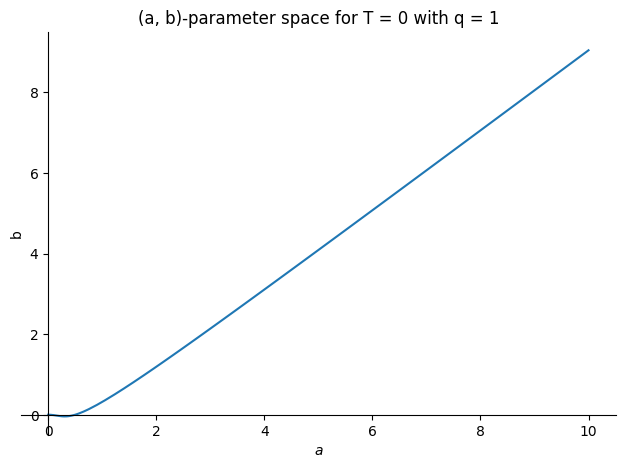

In [66]:
plot(
    Trace_eq_0_q_fix[0], (a, 0, 10),
    ylabel = "b",
    title = "(a, b)-parameter space for T = 0 with q = 1")